<a href="https://colab.research.google.com/github/masa-project/test/blob/master/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
 
im = cv2.imread('a.JPG')
print(im)

[[[226 191 123]
  [226 191 123]
  [226 191 123]
  ...
  [226 193 120]
  [231 194 120]
  [237 200 126]]

 [[226 191 123]
  [226 191 123]
  [226 191 123]
  ...
  [226 193 120]
  [231 194 120]
  [237 200 126]]

 [[226 191 123]
  [226 191 123]
  [226 191 123]
  ...
  [226 193 120]
  [231 194 120]
  [237 200 126]]

 ...

 [[ 23  18  17]
  [ 23  18  17]
  [ 23  18  17]
  ...
  [ 27  22  21]
  [ 28  23  22]
  [ 28  23  22]]

 [[ 23  18  17]
  [ 23  18  17]
  [ 23  18  17]
  ...
  [ 27  22  21]
  [ 28  23  22]
  [ 28  23  22]]

 [[ 23  18  17]
  [ 23  18  17]
  [ 23  18  17]
  ...
  [ 27  22  21]
  [ 28  23  22]
  [ 28  23  22]]]


In [ ]:
from matplotlib import pyplot as plt #matplotlibはpythonの描画ライブラリ
import typing
def check_point(input, point: typing.Tuple):
    """
    渡された座標を左上の頂点とする灰色の四角形を、渡された白黒画像配列に描画して返す。
    """
    square = [(point[0] + dy, point[1] + dx)
              for dy in range(7)
              for dx in range(7)]
    output = np.ndarray.copy(input)
    for p in square:
        output[p] = 150  # 適当な灰色
    return output
start_point = (15, 80)
check_point(im, start_point)
plt.imshow(im)


NameError: ignored

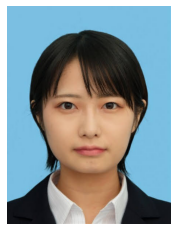

In [ ]:
from matplotlib import pyplot as plt
plt.axis('off')#軸を消去
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#BGRをRGBにする
plt.imshow(im_rgb)

True

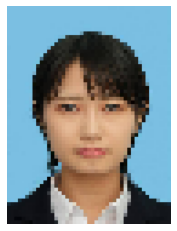

In [ ]:
blurred = cv2.blur(im_rgb, (10, 200))#ぼかす。かっこの数値は（よこ、縦）に連動していて、今回は縦が大きいので落下したみたいな画像になった
#plt.imshow(blurred)
plt.axis('off')#軸を消去


src = cv2.imread('矢部優奈.JPG')
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)#BGRをRGBにする
def mosaic(src, ratio=0.1):
    small = cv2.resize(src, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_NEAREST)
    return cv2.resize(small, src.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

dst_01 = mosaic(src)
cv2.imwrite('opencv_mosaic_01.jpg', dst_01)
plt.imshow(dst_01)
dst_005 = mosaic(src, ratio=0.05)
cv2.imwrite('opencv_mosaic_005.jpg', dst_005)

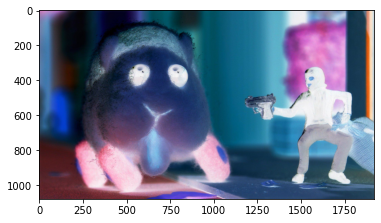

In [ ]:
import numpy as np#numpy は多次元配列を作ったりできる拡張モジュール

pixels = np.array(im_rgb)
pixels = 255 - pixels#画素値の反転
plt.imshow(pixels)

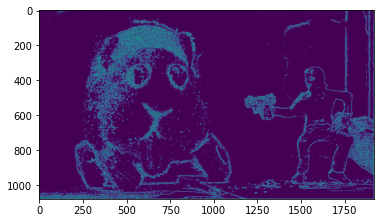

In [ ]:
gray_img=cv2.cvtColor(im_rgb,cv2.COLOR_BGR2GRAY)#gray
canny_img=cv2.Canny(gray_img,50,50)#輪郭強調
plt.imshow(canny_img)


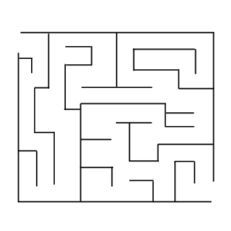

error: ignored

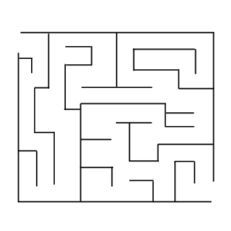

In [ ]:
import cv2
import numpy as np 
img = cv2.imread('meiro.jpg')
from matplotlib import pyplot as plt
def onMouse(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x, y)
plt.gray() #グレースケール
plt.axis('off')#軸を消去
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#BGRをRGBにする
plt.imshow(img_rgb)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
cv2.setMouseCallback('img', onMouse)


2290 471
2290


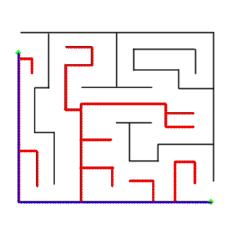

In [ ]:
import cv2
import numpy as np 
img = cv2.imread('meiro.jpg')
from matplotlib import pyplot as plt
start=[15,64]
goal=[280,269]
plt.gray() #グレースケール
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#BGRをRGBにする
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
#grayの画像を120の閾値で二値化
plt.axis('off')#軸を消去
pixels = np.array(thresh)
pixels = 255 - pixels#画素値の反転
plt.imshow(pixels)
#grayの画像を120の閾値で二値化
pixels = np.array(thresh)
pixels = 255 - pixels#画素値の反転
contours, hierarchy = cv2.findContours(pixels, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE )
#RETR_TREE入れ子構造・RETR_EXTERNAL一番外のみ
#cv2.drawContours(img_rgb, contours, -1, color=(0, 0, 255), thickness=2)
cv2.circle(img_rgb,center=(start[0],start[1]),radius=2,color=(50, 255, 50),thickness=4,lineType=cv2.LINE_4,shift=0)
cv2.circle(img_rgb,center=(goal[0],goal[1]),radius=2,color=(50, 255, 50),thickness=4,lineType=cv2.LINE_4,shift=0)
#cnt = contours[0]#contours number change
#img_rgb = cv2.drawContours(img_rgb, [cnt], 0, (0,255,0), 3)
#print(contours)
x= []
y= []
for k in contours:#contours is 2 
    for i in k:
        for j in i:
            x.append(j[0]) #append is add the number in end of list
            y.append(j[1])

a=len(x)#point number
lena=0
lenb=0
flag=0
alist=[]
blist=[]

for k in range(a):
  position=[x[k],y[k]]
  b=abs(x[k]-x[k+1])  #if connect dots end, break
  if b>5:
      break

  if (position==goal) or (position== start):
    if flag==0:
      lenb +=1
      blist.append(position)
      flag=1
    elif flag==1:
      lena +=1
      alist.append(position)
      flag = 2

    
  if (position !=goal) or (position!= start): 
    if flag==0 or flag ==2:
      lena +=1
      alist.append(position)
    elif flag==1:
      lenb +=1
      blist.append(position)

if lena>lenb:
  longer=lena
  result=alist
  shorter=blist
else:
    longer=lenb
    result=blist
    shorter=alist

print(lena,lenb)    
print(len(result))

for k in range(len(result)):
 plt.plot(result[k][0],result[k][1],marker='.',color='r',markersize =1) 

for k in range(len(shorter)):
 plt.plot(shorter[k][0],shorter[k][1],marker='.',color='b',markersize =1) 

plt.imshow(img_rgb)

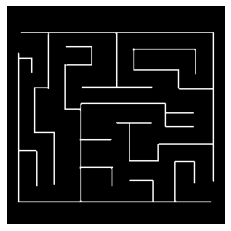

In [ ]:
import cv2
import numpy as np 
img = cv2.imread('meiro.jpg')
from matplotlib import pyplot as plt
plt.gray() #グレースケール
plt.axis('off')#軸を消去
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#BGRをRGBにする
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
#grayの画像を120の閾値で二値化
plt.axis('off')#軸を消去
pixels = np.array(thresh)
pixels = 255 - pixels#画素値の反転
plt.imshow(pixels)

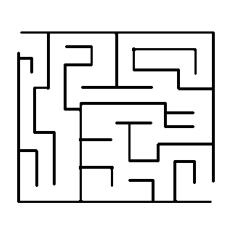

In [ ]:
import cv2
import numpy as np 
img = cv2.imread('meiro.png')
from matplotlib import pyplot as plt
plt.gray() #グレースケール
plt.axis('off')#軸を消去
#img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#BGRをRGBにする
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
#grayの画像を120の閾値で二値化
plt.axis('off')#軸を消去
pixels = np.array(thresh)
pixels = 255 - pixels#画素値の反転
#contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(
    pixels, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)
#plt.imshow(hierarchy)  ?????できない、以下の関数を用いて出力する必要がある
cv2.drawContours(gray, contours, -1, color=(0, 0, 255), thickness=2)
plt.axis('off')#軸を消去
plt.imshow(gray)

In [ ]:
import typing


def check_point(input,
                point: typing.Tuple):
    """
    渡された座標を左上の頂点とする灰色の四角形を、渡された白黒画像配列に描画して返す。
    """
    square = [(point[0] + dy, point[1] + dx)
              for dy in range(7)
              for dx in range(7)]
    output = np.ndarray.copy(input)
    for p in square:
        output[p] = 150  # 適当な灰色
    return output
start_point = (15, 80)
check_point(input, start_point)

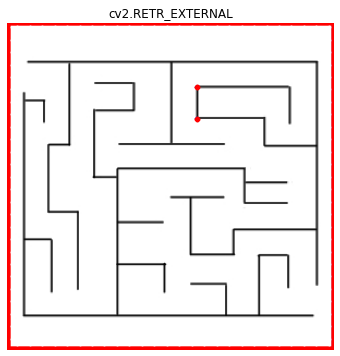

line 0 1196.000000
line 1 5.656854
line 2 5.656854


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import networkx as nx

def draw_contours(axes, img, contours):
    from matplotlib.patches import Polygon
    axes.imshow(img)
    axes.axis('off')
    for i, cnt in enumerate(contours):
        cnt = np.squeeze(cnt)
        # 点同士を結ぶ線を描画する。
        axes.add_patch(Polygon(cnt, fill=None, lw=2., color='b'))
        # 点を描画する。
        axes.plot(cnt[:, 0], cnt[:, 1],
                  marker='o', ms=4., mfc='red', mew=0., lw=0.)
        # 輪郭の番号を描画する。
       # axes.text(cnt[0][0], cnt[0][1], i, color='orange', size='20')


# 画像を読み込む。
img = cv2.imread('meiro.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#BGRをRGBにする
fig, axes = plt.subplots(figsize=(6, 6))


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
#grayの画像を120の閾値で二値化
plt.axis('off')#軸を消去
pixels = np.array(thresh)
pixels = 255 - pixels#画素値の反転
plt.imshow(pixels)

#img1 = img[0 : 50, 0: 50]
#cv2.imwrite("out_sample1.jpg", img1)

# 輪郭を抽出する。
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(gray, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# 抽出した輪郭を表示する。
axes.set_title('cv2.RETR_EXTERNAL')
draw_contours(axes, img, contours)
plt.show()
#print(hierarchy)
print(enumerate(contours))
for i in range(3):
 
  retval = cv2.arcLength(contours[i], True)
  print('line %d %f' %(i,retval))